# &#x1F4D1; &nbsp; <span style="color:red"> Reflections. Introduction To Reinforcement Learning. Lessons 7-8</span>

##   &#x1F916; &nbsp; <span style="color:red">Links & Libraries</span>

Reinforcement Learning: An Introduction http://incompleteideas.net/sutton/book/bookdraft2016aug.pdf

MULTI-ARMED BANDIT PROBLEMS: http://web.eecs.umich.edu/faculty/teneketzis/papers/MAB-Survey.pdf

Multi-Armed Bandits: https://dataorigami.net/blogs/napkin-folding/79031811-multi-armed-bandits

Exploration vs Exploitation: http://www0.cs.ucl.ac.uk/staff/D.Silver/web/Teaching_files/XX.pdf

Python Multi-armed Bandits (and Beer!): http://blog.yhat.com/posts/the-beer-bandit.html

Bayesian Reinforcement Learning: A Survey https://arxiv.org/pdf/1609.04436.pdf

Simple Reinforcement Learning in Tensorflow: Part 1 - Two-armed Bandit
https://medium.com/@awjuliani/super-simple-reinforcement-learning-tutorial-part-1-fd544fab149#.6hhgv1qdk

Introduction to Machine Learning (67577) Reinforcement Learning
http://www.cs.huji.ac.il/~shais/Lectures2014/lectureRL.pdf

Artificial Intelligence: A Modern Approach 

- http://aima.cs.berkeley.edu/
- https://code.google.com/archive/p/aima-python/  

Explorations of the Practical Issues of Learning Prediction-Control Tasks Using Temporal Difference Learning Methods

http://www.cc.gatech.edu/~isbell/papers/AITR-1424.pdf

Efficient Exploration for Reinforcement Learning http://cseweb.ucsd.edu/~ewiewior/04efficient.pdf

Multi-armed bandit https://en.wikipedia.org/wiki/Multi-armed_bandit

Multi-armed Bandits and the Gittins Index Theorem http://www.statslab.cam.ac.uk/~rrw1/oc/ocgittins.pdf

Bandit Problems, Markov Chains and Markov Decision Processes http://www.inf.ed.ac.uk/teaching/courses/rl/slides17/2_MAB_MDP.pdf

R-max https://ie.technion.ac.il/~moshet/brafman02a.pdf

Probably Approximately Correct (PAC) Exploration in Reinforcement Learning http://cs.brown.edu/~mlittman/theses/strehl.pdf

A modern Bayesian look at the multi-armed bandit http://www.economics.uci.edu/~ivan/asmb.874.pdf

Instance dependent lower bounds http://banditalgs.com/2016/09/30/instance-dependent-lower-bounds/

Lower bounds on regret https://www.stat.berkeley.edu/~bartlett/courses/2014fall-cs294stat260/lectures/bandit-lower-bound-notes.pdf

Best-of-K Bandits http://www.jmlr.org/proceedings/papers/v49/simchowitz16.pdf

Near-Optimal Reinforcement Learning in Polynomial Time https://www.cis.upenn.edu/~mkearns/papers/reinforcement.pdf

 Efficient Exploration http://webee.technion.ac.il/people/shimkin/LCS11/ch7_exploration.pdf

Algorithm-Directed Exploration for Model-Based Reinforcement Learning in Factored MDPs http://www.select.cs.cmu.edu/publications/paperdir/icml2002-guestrin-patrascu-schuurmans.pdf

Algorithms for Reinforcement Learning https://sites.ualberta.ca/~szepesva/papers/RLAlgsInMDPs.pdf

REINFORCEMENT LEARNING 2016/2017 http://www.inf.ed.ac.uk/teaching/courses/rl/lecturelist.html 

Policy Gradient http://www0.cs.ucl.ac.uk/staff/D.Silver/web/Teaching_files/pg.pdf

Beyond simple reinforcement learning: the computational neurobiology of reward-learning and valuation
http://www.olab.caltech.edu/download/p.-2012-european_journal_of_neuroscience.pdf   

In [1]:
from IPython.core.display import Image
from pymc import rbeta
import numpy as np

##  &#x1F916; &nbsp;  <span style="color:red"> Lesson 7. Exploring Exploration</span>

**Exploration vs Exploitation Dilemma** - online decision making involves a fundamental choice:
    
- Exploitation - make the best decision given current information
- Exploration: gather more information

The best long–term strategy may involve short–term sacrifices.

Gather enough information to make the best overall decisions.

Several strategies have been proposed for balancing exploration with exploitation. There is a class of simple strategies known as greedy in the limit of infinite exploration (GLIE). These strategies randomly choose between making the decision thought to be best (the greedy choice), or to take some other one. They guarantee that after an
infinite number of samples, an accurate representation of the domain is learned. Also, as more samples are collected, the probability the greedy choice is taken approaches one. Because each decision will eventually be sampled enough to accurately estimate the expected long-term reward, the greedy choice becomes optimal. 

List of Principles

- Naive Exploration
  - Add noise to greedy policy (e.g. -greedy)
- Optimistic Initialisation
  - Assume the best until proven otherwise
- Optimism in the Face of Uncertainty
  - Prefer actions with uncertain values
- Probability Matching
  - Select actions according to probability they are best
- Information State Search
  - Lookahead search incorporating value of information

**A k-Armed Bandit Problem**

The agent is faced repeatedly with a choice among k different options, or actions. After each choice the decision maker receives a numerical reward chosen from a stationary probability distribution that depends on the selected action. The agent's objective is to maximize the expected total reward over some time period, for example, over 1000 action selections, or time steps. This is the original form of the k-armed bandit problem, so named by analogy to a
slot machine, or “one-armed bandit,” except that it has k levers instead of one. Each action selection is like a play of one of the slot machine’s levers, and the rewards are the payoffs for hitting the jackpot. Through repeated action selections you are to maximize agent winnings by concentrating actions on the best levers.

In the k-armed bandit problem, each of the k actions has an expected or mean reward (the value of that action).

If you maintain estimates of the action values, then at any time step there is at least one action whose estimated value is greatest. We call these the greedy actions. When you select one of these actions, we say that you are exploiting your current knowledge of the values of the actions. If instead you select one of the nongreedy actions, then we say you are exploring, because this enables you to improve your estimate of the nongreedy action’s value. Exploitation is the right thing to do to maximize the expected reward on the one step, but exploration may produce the
greater total reward in the long run.

Multi-armed bandit as a class of the one-state MDP

- N independent arms with fully observable states [Z1(t), . . . , ZN (t)]
- One arm is activated at each time
- Active arm changes state (known Markov process) and offers reward Ri(Zi(t))
- Passive arms are frozen and generate no reward

Why is sampling stochastic processes with unknown distributions an MDP?

- The state of each arm is the posterior distribution fi(t) (information state)
- For an active arm, fi(t + 1) is updated from fi(t) and the new observation
- For a passive arm, fi(t + 1) = fi(t)

Value of Information

- How much reward a decision-maker would be prepared to pay in order to have that information, prior to making a decision
- Long-term reward after getting information - immediate reward 

Information gain is higher in uncertain situations, therefore it makes sense to explore uncertain situations more

If we know value of information, we can trade-off exploration and exploitation optimally

Examples of polynomial-time algorithms for on-line learning in MDPs:
    
- E3 (Kearns & Singh, 2002).
- R-max (Brafman & Tennenholtz, 2002).
- MBIE (Strehl & Littman,2005).
- Delayed Q-learning (Strehl et al., 2005)

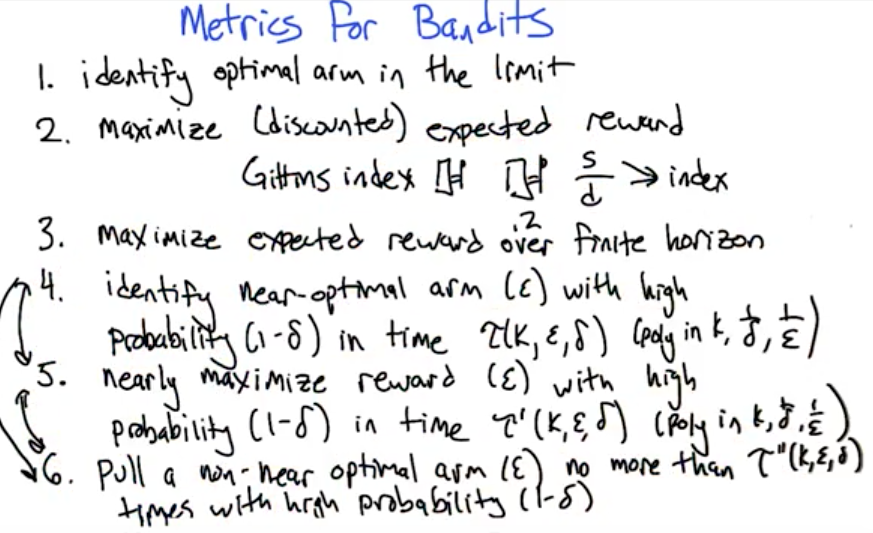

In [2]:
Image('7-8_01.png')

**The Gittins index** is a dynamic allocation index for the sequential design of experiments and a measure of the reward that can be achieved by a random process bearing a termination state and evolving from its present state onward, under the option of terminating the said process at every later stage with the accrual of the probabilistic expected reward from that stage up to the attainment of its termination state. It is a real scalar value associated to the state of a stochastic process with a reward function and a probability of termination.

The idea of **upper confidence bound (UCB)** action selection is that the square-root term is a measure of the uncertainty or variance in the estimate of a’s value. The quantity being max'ed over is thus a sort of upper bound on the possible true value of action a, with the c parameter determining the confidence level. Each time a is selected the uncertainty is presumably reduced; Nt(a) is incremented and, as it appears in the denominator of the uncertainty term, the term is decreased. On the other hand, each time an action other than a is selected t is increased; as it appears in the numerator the uncertainty estimate is increased. The use of the natural logarithm means that the increase gets smaller over time, but is unbounded; all actions will eventually be selected, but as time goes by it will be a longer wait, and thus a lower selection frequency, for actions with a lower value estimate or that have already been selected more times.

KWIK Learning “Knows What It Knows”

- Like PAC, no mistakes.
- Like mistake bound, no distribution assumption.

- Harder problem
  - PAC <= mistake bound <= KWIK
  
- Very well suited to model learning:
  - experience distribution changes during learning (distribution varies with behavior, which should change)
  - exploration driven by known/unknown distinction (don’t want to be wrong and stop exploring too soon)

**R-max** – A General Polynomial Time Algorithm for Near-Optimal Reinforcement Learning

In R-max, the agent always maintains a complete, but possibly inaccurate model of its environment and acts based on the optimal policy derived from this model. The model is initialized in an optimistic fashion: all actions in all states return the maximal possible reward (hence the name). During execution, it is updated based on the agent’s observations.

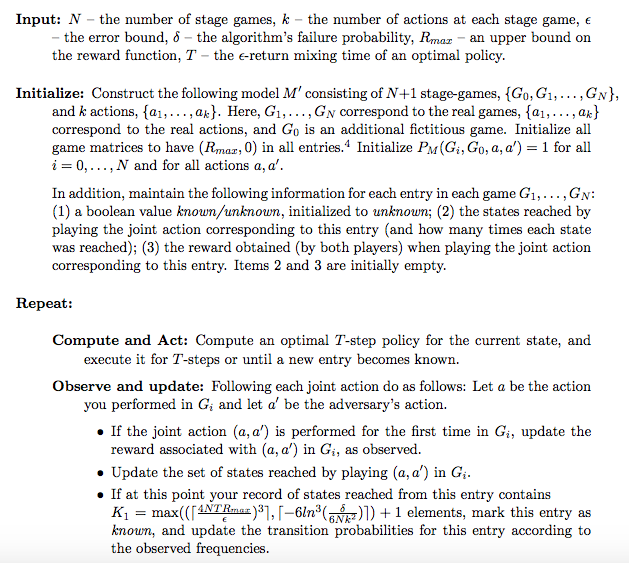

In [3]:
Image('7-8_02.png')

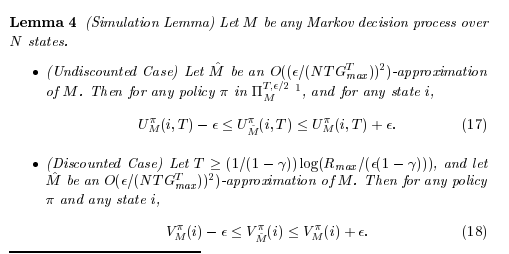

In [4]:
Image('7-8_03.png')

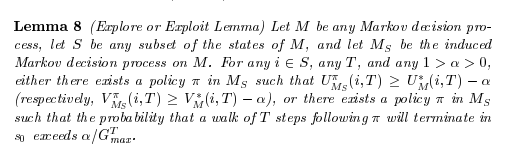

In [5]:
Image('7-8_04.png')

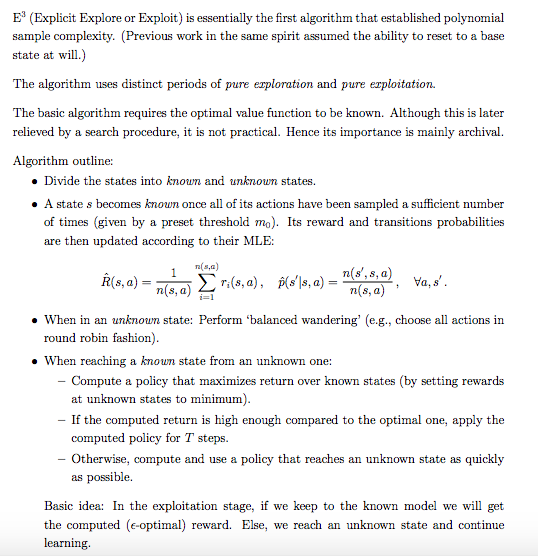

In [8]:
Image('7-8_05.png')

**Bayesian methods** assume a known initial distribution over the action values and then updates the distribution exactly after each step (assuming that the true action values are stationary). In general, the update computations can be very complex, but for certain special distributions (called conjugate priors) they are easy. One possibility is to select actions at each step according to their posterior probability of being the best action. This method sometimes calls posterior sampling or Thompson sampling. In the Bayesian setting, it is even conceivable to compute the optimal balance between exploration and exploitation.

Bayes Optimal Exploration

- With a Bayesian representation of models, we can plan in the space of posteriors.
  - Can use posterior to evaluate the likelihood of any possible outcome of an action.
  - Can model how that outcome will change the posterior.
  - Can choose actions that truly maximize expected reward: 
    no artificial distinction between exploring and exploiting or learning and acting.
  
- Hideously intractable except in some special cases (bandits, short horizons).

***Semi-uniform*** strategies were the earliest (and simplest) strategies discovered to approximately solve the bandit problem. All those strategies have in common a greedy behavior where the best lever (based on previous observations) is always pulled except when a (uniformly) random action is taken.

- **Epsilon-greedy strategy**: The best lever is selected for a proportion ${\displaystyle 1-\epsilon }$  of the trials, and a lever is selected at random (with uniform probability) for a proportion ${\displaystyle \epsilon }$. A typical parameter value might be ${\displaystyle \epsilon =0.1}$, but this can vary widely depending on circumstances and predilections.
- **Epsilon-first strategy**: A pure exploration phase is followed by a pure exploitation phase. For ${\displaystyle N}$ trials in total, the exploration phase occupies ${\displaystyle \epsilon N}$ trials and the exploitation phase ${\displaystyle (1-\epsilon )N}$. During the exploration phase, a lever is randomly selected (with uniform probability); during the exploitation phase, the best lever is always selected.
- **Epsilon-decreasing strategy**: Similar to the epsilon-greedy strategy, except that the value of ${\displaystyle \epsilon }$  decreases as the experiment progresses, resulting in highly explorative behavior at the start and highly exploitative behavior at the finish.
- **An adaptive epsilon-greedy strategy based on value differences (VDBE)**: Similar to the epsilon-decreasing strategy, except that epsilon is reduced on basis of the learning progress instead of manual tuning. High fluctuations in the value estimates lead to a high epsilon (high exploration, low exploitation); low fluctuations to a low epsilon (low exploration, high exploitation). Further improvements can be achieved by a softmax-weighted action selection in case of exploratory actions.
- **Contextual-Epsilon-greedy strategy**: Similar to the epsilon-greedy strategy, except that the value of ${\displaystyle \epsilon }$  is computed regarding the situation in experiment processes, which let the algorithm be Context-Aware. It is based on dynamic exploration/exploitation and can adaptively balance the two aspects by deciding which situation is most relevant for exploration or exploitation, resulting in highly explorative behavior when the situation is not a critical and highly exploitative behavior at the critical situation.

***Probability matching strategies*** reflect the idea that the number of pulls for a given lever should match its actual probability of being the optimal lever. Probability matching strategies are also known as Thompson sampling or Bayesian Bandits, and surprisingly easy to implement if you can sample from the posterior for the mean value of each alternative. Probability matching strategies also admit solutions to so-called contextual bandit problems.

***Pricing strategies*** establish a price for each lever. For example, as illustrated with the POKER algorithm, the price can be the sum of the expected reward plus an estimation of extra future rewards that will gain through the additional knowledge. The lever of highest price is always pulled.

***Strategies with ethical constraints*** minimize the assignment of any patient to an inferior arm ("physician's duty"). In a typical case, they minimize expected successes lost (ESL), that is, the expected number of favorable outcomes that were missed because of assignment to an arm later proved to be inferior. Another version minimizes resources wasted on any inferior, more expensive, treatment.

##  &#x1F916; &nbsp;  <span style="color:red"> Lesson 8.  Generalization</span>

The kind of generalization we require is often called function approximation because it takes examples from the desired function (e.g., a value function) and attempts to generalize from them to construct an approximation of the entire function. Function approximation is an instance of supervised learning, the primary topic studied in machine learning, artificial neural networks, pattern recognition, and statistical curve fitting. 

In theory, any of the methods studied in these fields can be used in the role of function approximator within reinforcement learning algorithms, although in practice some fit more easily into this role than others.

Nevertheless, reinforcement learning with function approximation involves a number of new issues that do not normally arise in conventional supervised learning, such as nonstationarity, bootstrapping, and delayed targets. 

Perhaps the most suitable supervised learning methods are those using parameterized function approximation, in which the policy is parameterized by a weight vector θ. Although the weight vector has many components, the state space is much larger still and we must settle for an approximate solution. MSVE(θ) is usually defined as a measure of the error in the values Vπθ(s) for a weight vector θ under the on-policy distribution d. The MSVE gives us a clear way to rank different value-function approximations in the on-policy case.

**On-policy Prediction with Approximation**

- Stochastic-gradient and Semi-gradient Methods
- Linear Methods
  - Coarse Coding $\rightarrow$ Tile Coding $\rightarrow$ Radial Basis Functions $\rightarrow$ Kanerva Coding
- Nonlinear Function Approximation: Artificial Neural Networks

**On-policy Control with Approximation**

**Off-policy Methods with Approximation (Bootstrapping)**

- Baird's Counterexample 
- Tsitsiklis and Van Roy's Counterexample

**Eligibility Traces**

- one of the basic mechanisms of reinforcement learning
- unify and generalize TD and Monte Carlo methods
  - when TD methods are augmented with eligibility traces, they produce a family of methods spanning a spectrum that has Monte Carlo methods at one end and one-step TD methods at the other
- a temporary record of the occurrence of an event, such as the visiting of a state or the taking of an action
  - eligibility traces help bridge the gap between events and training information
- require more computation than one-step methods
- offer significantly faster learning, particularly when rewards are delayed by many steps

**Policy Gradient Methods**

- Policy depends on some parameters θ
  - Action preferences
  - Mean and variance
  - Weights of a neural network
- Modify policy parameters directly instead of estimating the action values
- Search for a local maximum in the policy objective function J(θ) by ascending the gradient of the policy, w.r.t. parameters θ
- Examples: Actor-Critic Methods
  - They have a separate memory structure to explicitly represent the policy independent of the value function. The policy structure is known as the actor, because it is used to select actions, and the estimated value function is known as the critic, because it criticizes the actions made by the actor. Learning is always on-policy: the critic must learn about and critique whatever policy is currently being followed by the actor. The critique takes the form of a TD error. 

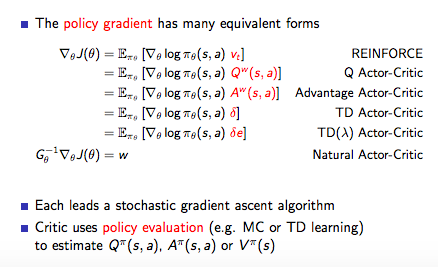

In [2]:
Image('7-8_06.png')

Advantages:

- Better convergence properties
- Effective in high-dimensional or continuous action spaces
- Can learn stochastic policies

Disadvantages:

- Typically converge to a local rather than global optimum
- Evaluating a policy is typically inefficient and high variance

Quiz: Calculus! $\ \large {f_i(s)}$

In [5]:
# Quiz: Bad Update Sequence - 2
0.1*(0+0.9*8-3)*1 # alpha * (r + gamma * V(s') - V(s)) * (deltaV(s)/deltaW0)

0.42000000000000004

In [6]:
0.1*(0.9*73.8-73.8)*7

-5.165999999999997

In [7]:
# Quiz: Bad Update Sequence - 4
# 0 0 0 0 0 0 0

In [ ]:
# Quiz: Averagers - 3
# KNN

##  &#x1F916; &nbsp;  <span style="color:red"> Examples </span>

In [4]:
# Bayesian Bandits
rand = np.random.rand

class Bandits(object):
    """
    This class represents N bandits machines.
    parameters:
        p_array: a (n,) Numpy array of probabilities >0, <1.
    methods:
        pull( i ): return the results, 0 or 1, of pulling 
                   the ith bandit.
    """
    def __init__(self, p_array):
        self.p = p_array
        self.optimal = np.argmax(p_array)
        
    def pull( self, i ):
        #i is which arm to pull
        return rand() < self.p[i]
    
    def __len__(self):
        return len(self.p)

    
class BayesianStrategy( object ):
    """
    Implements a online, learning strategy to solve
    the Multi-Armed Bandit problem.
    
    parameters:
        bandits: a Bandit class with .pull method
    
    methods:
        sample_bandits(n): sample and train on n pulls.
    attributes:
        N: the cumulative number of samples
        choices: the historical choices as a (N,) array
        bb_score: the historical score as a (N,) array
    """
    
    def __init__(self, bandits):
        
        self.bandits = bandits
        n_bandits = len( self.bandits )
        self.wins = np.zeros( n_bandits )
        self.trials = np.zeros(n_bandits )
        self.N = 0
        self.choices = []
        self.bb_score = []

    
    def sample_bandits( self, n=1 ):
        
        bb_score = np.zeros( n )
        choices = np.zeros( n )
        
        for k in range(n):
            #sample from the bandits's priors, and select the largest sample
            choice = np.argmax( rbeta( 1 + self.wins, 1 + self.trials - self.wins) )
            
            #sample the chosen bandit
            result = self.bandits.pull( choice )
            
            #update priors and score
            self.wins[ choice ] += result
            self.trials[ choice ] += 1
            bb_score[ k ] = result 
            self.N += 1
            choices[ k ] = choice
            
        self.bb_score = np.r_[ self.bb_score, bb_score ]
        self.choices = np.r_[ self.choices, choices ]
        return 